## Esercizio 03.1

Ho svolto questo esercizio, in cui ho stabilito il prezzo di un'opzione put e una call europee. Come abbiamo visto a lezione tale prezzo può essere stabilito in modo esatto attraverso la teoria di Black-Scholes risolvendo l'omonima equazione differenziale alle derivate parziali. Stabiliamo quindi anzitutto i valori esatti del prezzo delle due opzioni con i parametri richiesti:

In [9]:
import scipy
from scipy.special import erf
from scipy import log, exp, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


C:\Users\Utente\anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
C:\Users\Utente\anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
C:\Users\Utente\anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
C:\Users\Utente\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  
C:\Users\Utente\anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
C:\Users\Utente\anaconda3\lib\site-packages\ipykernel_launcher.py:20: DeprecationWa

Di seguito valuterò i prezzi delle due opzioni in un modo alternativo. Abbiamo visto che il prezzo viene stabilito sulla base del profitto derivante dall'utilizzo dell'opzione, il quale a sua volta dipende dall'andamento del prezzo del bene associato $S(T)$. Per stabilire il prezzo dell'opzione si considera quindi il valor medio del profitto $e^{-rT}\big(S(T)-K\big)^+$. Abbiamo studiato che $S(T)$ evolve con moto browninano geometrico, per cui attraverso il campionamento di un moto browniano geometrico e il calcolo del valor medio posso stabilire il prezzo delle due opzioni. Dapprima svolgo il campionamento direttamente all'istante di interesse.

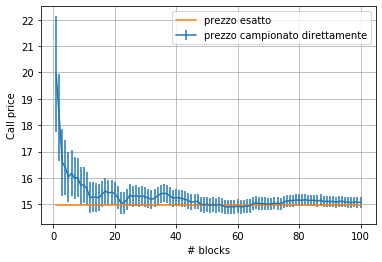

In [13]:
import matplotlib.pyplot as plt
import numpy as np

dataC = np.loadtxt("esercizio03_1/callPriceDir.dat")

x = [1, 100]
y = [call, call]

blocks = np.linspace(1, 100, 100)
plt.errorbar(blocks,dataC[:,0], yerr = dataC[:,1], label="prezzo campionato direttamente")

# Plot a horizontal line
plt.plot(x, y, label="prezzo esatto")
plt.grid(True)
plt.xlabel("# blocks")
plt.ylabel("Call price")
plt.legend()
plt.show()

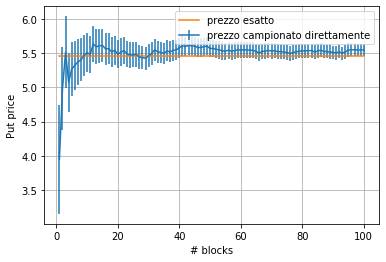

In [16]:
dataP = np.loadtxt("esercizio03_1/putPriceDir.dat")

x = [1, 100]
y = [put, put]

blocks = np.linspace(1, 100, 100)
plt.errorbar(blocks,dataP[:,0], yerr = dataP[:,1], label="prezzo campionato direttamente")

# Plot a horizontal line
plt.plot(x, y, label="prezzo esatto")
plt.grid(True)
plt.xlabel("# blocks")
plt.ylabel("Put price")
plt.legend()
plt.show()

Notiamo che per entrambe le opzioni il prezzo trovato attraverso il metodo MC è in accordo con il valore esatto determinato dalla teoria di Black-Scholes.

Nella seconda parte dell'esercitazione ho ricavato il prezzo delle due opzioni suddividendo l'intervallo temporale tra l'istante iniziale (al quale viene fornito il prezzo del bene) e l'istante a cui interessa stabilire il prezzo, in 100 istanti temporali intermedi, in corrispondenza dei quali campiono dei valori del prezzo dell'asset ricostruendo così il GBM. Ricordo che questo tipo di procedura non introduce alcun errore di discretizzazione (il metodo è esatto).

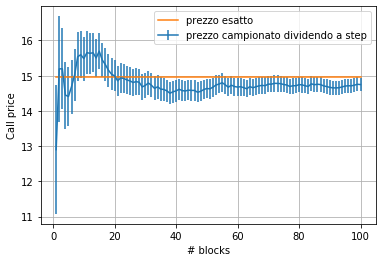

In [18]:
dataC = np.loadtxt("esercizio03_1/callPriceDis.dat")

x = [1, 100]
y = [call, call]

blocks = np.linspace(1, 100, 100)
plt.errorbar(blocks,dataC[:,0], yerr = dataC[:,1], label="prezzo campionato dividendo a step")

# Plot a horizontal line
plt.plot(x, y, label="prezzo esatto")
plt.grid(True)
plt.xlabel("# blocks")
plt.ylabel("Call price")
plt.legend()
plt.show()

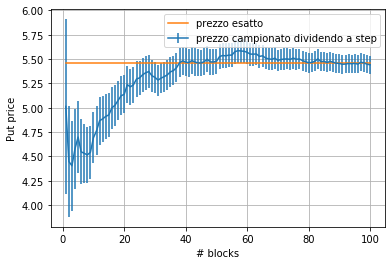

In [20]:
dataC = np.loadtxt("esercizio03_1/putPriceDis.dat")

x = [1, 100]
y = [put, put]

blocks = np.linspace(1, 100, 100)
plt.errorbar(blocks,dataC[:,0], yerr = dataC[:,1], label="prezzo campionato dividendo a step")

# Plot a horizontal line
plt.plot(x, y, label="prezzo esatto")
plt.grid(True)
plt.xlabel("# blocks")
plt.ylabel("Put price")
plt.legend()
plt.show()

Anche in questo caso i risultati ottenuti sono in pieno accordo con i prezzi esatti calcolati con la teoria di Black-Scholes.